# Open a grid and save as an HGD

An HGD is a Geosoft "hyper-grid", which supports dealiased access to grid/image data at any resolution. 
This is helpful when the original data is at a very high resolution (small cell size) and you need to
work with the data at a lower resolution. Simply sampling the data at smaller size will cause aliasing, which
usually appears as a noisy image at the cell resolution. HGD effectivly smooth the data to remove 
wavenumber information smaller than can be sampled at the desired coarser resolution.

For example, DEM (Digital Elevation Model) data may have been obtained at a 10 metre resolution, but you
want to work with it at a 250 metre resolution. If you just regrid or resample this at 250m there will
be aliasing noise.  Instead, open the 10 metre grid, save it as an HGD, then open the HGD at a 250 metre
cell size. This can be saved to a new grid and the HGD discarded.

## Context

This grid format was developed to support grid and image data on Geosoft's DAP servers. This allows for automatic
dealiasing when data is windowed and downloaded from DAP servers.  If the data is stored as an HGD on the DAP server,
the data will be dealiased when downloaded.

You might find data of interest on Geosoft's (Seequent's) server: https://public.dap.seequent.com/GDP/Search

In [3]:
import geosoft.gxpy.gx as gx
import geosoft.gxpy.grid as gxgrid
from IPython.display import Image
import numpy as np
import pprint
gxc = gx.GXpy()

In [4]:
inName = '..\SampleData\BigIslandDEM'
g=gxgrid.Grid.open(inName)

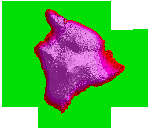

In [5]:
# this imaging appears noisy at this coarse sampling
Image(g.image_file(shade=True, pix_width=150))

In [6]:
# create an decorated name for the HGD file.  The (HGD) added to the end of the file name
# will result in an HGD file when this file is created.
gHgdName = gxgrid.Grid.decorate_name(inName+'.hgd', 'HGD')
print(gHgdName)

..\SampleData\BigIslandDEM.hgd(HGD)


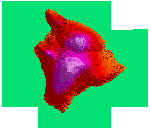

In [7]:
# create the HGD as a copy of the original grid
gHGD = gxgrid.Grid.copy(g, gHgdName)

# imaging the HGD at a coarse resolution will be dealiased.
Image(gHGD.image_file(shade=True, pix_width=150))

In [8]:
# cleaning up workspace...
# The HGD creates a number of support files.  Here we delete the files associated with the HGD to 
# clean-up this example workspace.
gHGD.delete_files()

# the shaded imaging also created a shaded relief grid. The best way to remove grids is to open
# the grid and use the delete_files() method to have all associated files removed when the instance
# is destroyed.
gxgrid.Grid.open(inName+'_s.grd').delete_files()

In [9]:
# exiting the script will remove all resources
exit()